# Individual Exercise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("schools_combined.csv")

c:\users\eric\scoop\apps\miniconda3\current\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


**Let's practice creating plots! Try replicating the following images:**

1. Number of enrolled students per region arranged alphabetically

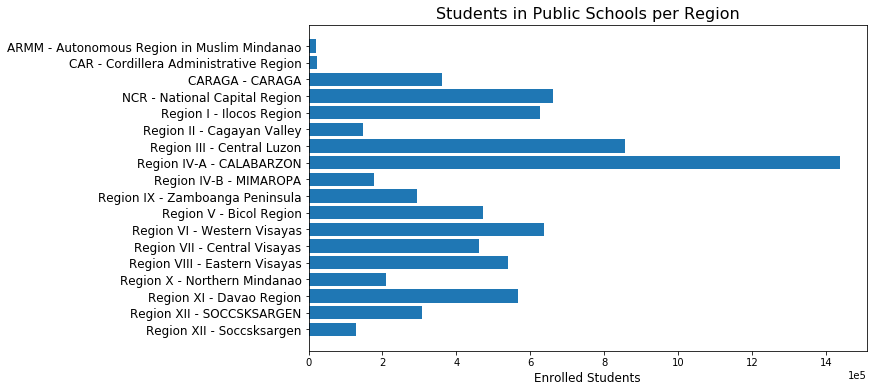

In [3]:
df.head()

,Unnamed: 0,region,province,municipality,division,school_id,school_name,year_level,gender,enrollment,latitude,longitude,ID,Total_Enro,Total_Inst,Rooms_used,Rooms_unused,Type_of_Sc
0,0,Region I - Ilocos Region,Ilocos Norte,Bacarra,Ilocos Norte,100002,Bacarra CES,grade 1,male,41,18.25096389,120.6089583,100002,318,16,12.0,0.0,School with no Annexes
1,1,Region I - Ilocos Region,Ilocos Norte,Bacarra,Ilocos Norte,100002,Bacarra CES,grade 1,female,30,18.25096389,120.6089583,100002,318,16,12.0,0.0,School with no Annexes
2,2,Region I - Ilocos Region,Ilocos Norte,Bacarra,Ilocos Norte,100002,Bacarra CES,grade 2,male,37,18.25096389,120.6089583,100002,318,16,12.0,0.0,School with no Annexes
3,3,Region I - Ilocos Region,Ilocos Norte,Bacarra,Ilocos Norte,100002,Bacarra CES,grade 2,female,38,18.25096389,120.6089583,100002,318,16,12.0,0.0,School with no Annexes
4,4,Region I - Ilocos Region,Ilocos Norte,Bacarra,Ilocos Norte,100002,Bacarra CES,grade 3,male,41,18.25096389,120.6089583,100002,318,16,12.0,0.0,School with no Annexes


*Hint: figsize=10,6; axis labels fontsize=12; title fontsize=16*

In [27]:
# Insert code here
df_students_byRegion = df.groupby('region').enrollment.sum().reset_index().sort_values(by='region', ascending=False)
df_students_byRegion

,region,enrollment
17,Region XII - Soccsksargen,127007
16,Region XII - SOCCSKSARGEN,307972
15,Region XI - Davao Region,566220
14,Region X - Northern Mindanao,209469
13,Region VIII - Eastern Visayas,540624
12,Region VII - Central Visayas,460345
11,Region VI - Western Visayas,635880
10,Region V - Bicol Region,471705
9,Region IX - Zamboanga Peninsula,294390
8,Region IV-B - MIMAROPA,178360


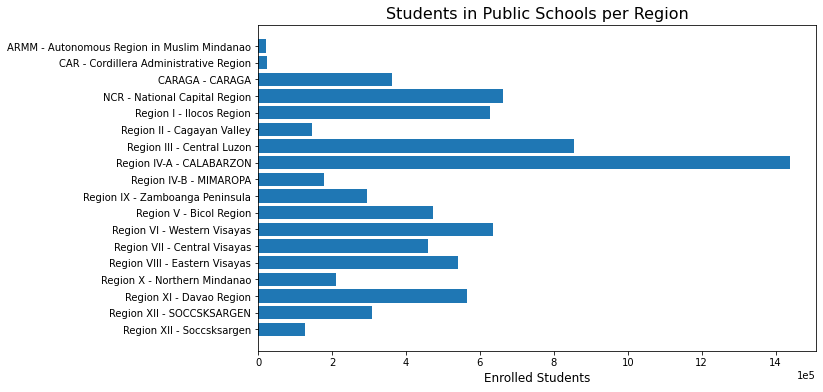

In [31]:
# indicates if plotting on the figues or on subplots
plt.figure(figsize=(10,6)) 

# the main code to create the graph
plt.barh(df_students_byRegion.region, df_students_byRegion.enrollment) 
regions = df_students_byRegion.region.sort_values()

# # additional elements that can be customzed
plt.title("Students in Public Schools per Region", fontsize=16)
plt.xlabel("Enrolled Students", fontsize=12)
plt.ticklabel_format(style='sci', axis='x', scilimits=(5,5))

# # display graph
plt.show()

2. Number of schools, teachers, and classroom in each district of Metro Manila. The dataset has been prepared for you.

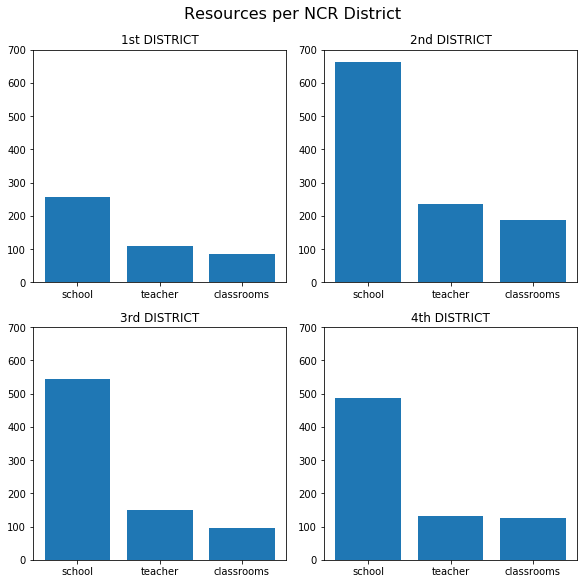

*Hint: figsize=8,8; title fontsize=16*

In [50]:
ncr = df[df["region"]=="NCR - National Capital Region"]
ncr_district = (ncr.groupby(["province"])[["school_id", "Total_Inst", "Rooms_used"]]
                .agg(school=("school_id", len), 
                     teacher=("Total_Inst", max),
                     classrooms=("Rooms_used", max))
                .reset_index()
                .melt(id_vars=["province"])).set_index("province")
ncr_district

,variable,value
province,,
"Manila, Ncr, First District",school,256.0
Ncr Fourth District,school,488.0
Ncr Second District,school,664.0
Ncr Third District,school,544.0
"Manila, Ncr, First District",teacher,110.0
Ncr Fourth District,teacher,132.0
Ncr Second District,teacher,236.0
Ncr Third District,teacher,151.0
"Manila, Ncr, First District",classrooms,85.0


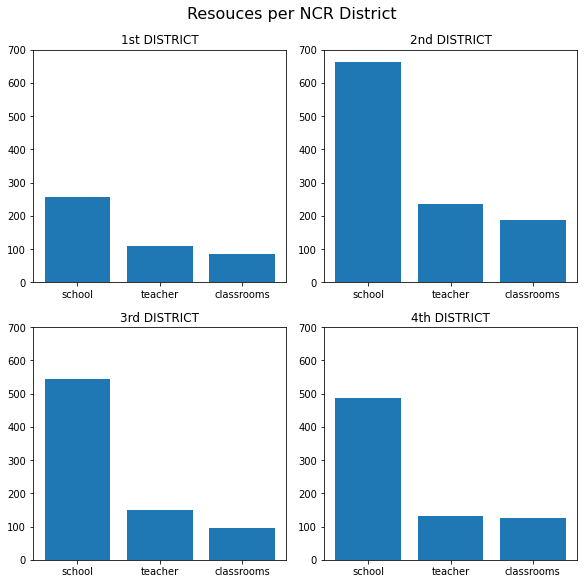

In [49]:
# Insert code here
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8),  constrained_layout=True)

first_district = ncr_district[ncr_district.index.str.contains('First District')]
second_district = ncr_district[ncr_district.index.str.contains('Second District')]
third_district = ncr_district[ncr_district.index.str.contains('Third District')]
fourth_district = ncr_district[ncr_district.index.str.contains('Fourth District')]


axes[0,0].bar(first_district["variable"], first_district["value"]) 
axes[0,0].set_title("1st DISTRICT")
axes[0,0].set_ylim(0,700)
axes[0,1].bar(second_district["variable"], second_district["value"]) 
axes[0,1].set_title("2nd DISTRICT")
axes[0,1].set_ylim(0,700)
axes[1,0].bar(third_district["variable"], third_district["value"]) 
axes[1,0].set_title("3rd DISTRICT")
axes[1,0].set_ylim(0,700)
axes[1,1].bar(fourth_district["variable"], fourth_district["value"]) 
axes[1,1].set_title("4th DISTRICT")
axes[1,1].set_ylim(0,700)

fig.suptitle('Resouces per NCR District', fontsize=16)
plt.show()

